# <font color='gren'> Exercício 1


In [97]:
import numpy as np
import matplotlib.pylab as plt

## 1 - Funções auxiliares

* Método de Jacobi : modificada para retornar número de interações

In [98]:


def metod_jacobi(N,tol):
    
    Told = np.zeros(shape=(N,N))
    # Temperaturas nas bordas
    Told[0,:] = 0.0 # TL
    Told[N-1,:] = 0.0 # TR
    Told[:,0] = 0.0 # TB
    Told[:,N-1] = 20.0 # TT

    # Loop de iteracoes
    Nmax = 10000
    Tnew = Told.copy()
    for iter in range(Nmax):
        Tnew[1:N-1,1:N-1] = 0.25*(Told[2:N,1:N-1] + Told[0:N-2,1:N-1] + \
                                Told[1:N-1,2:N] + Told[1:N-1,0:N-2])
        
        error = np.linalg.norm(Tnew-Told)
        #print(iter, '  ', error)
        if(error < tol):
            return iter
            
        Told = Tnew.copy()

* Método de Gauss-Seidel: modificada para retornar número de interações

In [99]:
def metod_gauss_seidel(N,tol):

    Told = np.zeros(shape=(N,N))

    # Temperaturas nas bordas
    Told[0,  :] = 0.0 # TL
    Told[N-1,:] = 0.0 # TR
    Told[:,  0] = 0.0 # TB
    Told[:,N-1] = 20.0 # TT

    # Loop de iteracoes
    Nmax = 10000
    Tnew = Told.copy()
    for iter in range(Nmax):
        for i in range(1,N-1):
            for j in range(1,N-1):
                Tnew[i,j] = 0.25*(Told[i+1,j] + Tnew[i-1,j] +\
                                Told[i,j+1] + Tnew[i,j-1])
        
        error = np.linalg.norm(Tnew-Told)
        #print(iter, '  ', error)
        if(error < tol):
            return iter
            
        Told = Tnew.copy()

* Plot de tabela

In [100]:
def plot_table(relacao,colunas,linhas):
    #define figure and axes
    fig, ax = plt.subplots()

    #hide the axes
    fig.patch.set_visible(True)
    ax.axis('off')
    ax.axis('tight')
    
    #gera a tabela
    plt.title('Relação entre número de interações e o método de iteração usado (com uma dada tolerância)')
    table = ax.table(cellText=relacao, colLabels=colunas, rowLabels=linhas)

    #display table
    fig.tight_layout()
    plt.show()

## 2 - Execução de programa

['Jacobi (tol=10^-5)' 'Gauss-Seidel (tol=10^-5)' 'Jacobi (tol=10^-8)'
 'Gauss-Seidel (tol=10^-8)']
['N=11' 'n=21' 'n=41']


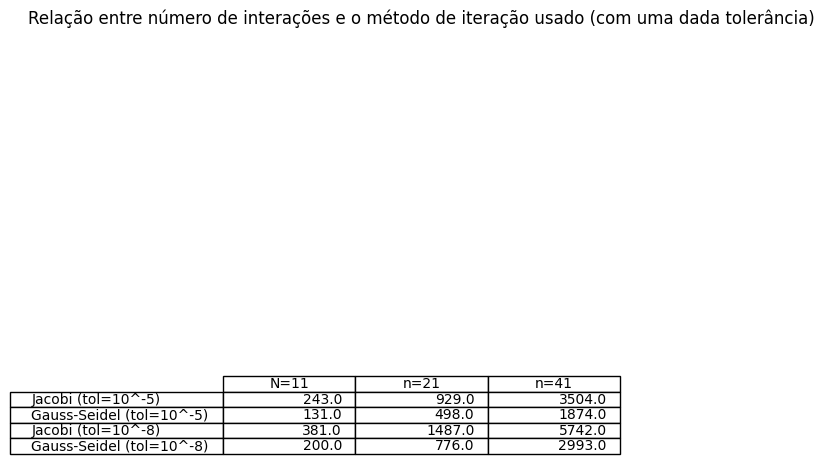

In [101]:
relacao=np.zeros(shape=(4,3))
N=np.array(3)
N=[11,21,41]
for i in range (0,len(N)):
    relacao[0][i]=metod_jacobi(N[i],10**(-5))
    relacao[1][i]=metod_gauss_seidel(N[i],10**(-5))
    relacao[2][i]=metod_jacobi(N[i],10**(-8))
    relacao[3][i]=metod_gauss_seidel(N[i],10**(-8))
colunas=np.array(['N=11','n=21','n=41'],dtype=str)
linhas=np.array(['Jacobi (tol=10^-5)','Gauss-Seidel (tol=10^-5)','Jacobi (tol=10^-8)','Gauss-Seidel (tol=10^-8)'],dtype=str)
print(linhas)
print(colunas)
plot_table(relacao,colunas,linhas)